In [1]:
from keras.models import load_model

model = load_model('traffic_classifier.h5')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

(1, 30, 30, 3)


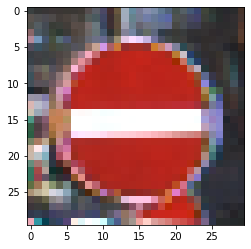

In [50]:
from keras.preprocessing import image
import numpy as np

y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Pre-processing the image
img = image.load_img(imgs[1000], target_size = (30, 30))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [30]:
from keras import models
from keras import layers

In [68]:
# Outputs of the 12 layers
layer_outputs = [layer.output for layer in model.layers[:12]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations of first layer
first_layer_activation = activations[0]
sixth_layer_activation = activations[5]  
# shape of first layer activation
print(first_layer_activation.shape)
print(sixth_layer_activation.shape)  


(1, 26, 26, 32)
(1, 7, 7, 64)


C:\Users\2001p\AppData\Local\Temp\ipykernel_7324\3715539303.py:28: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

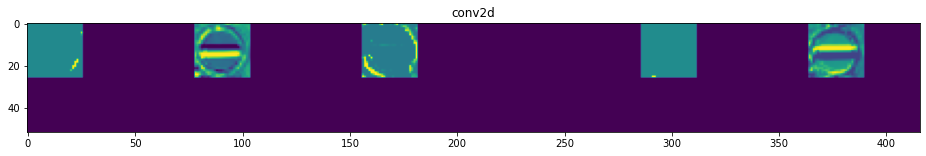

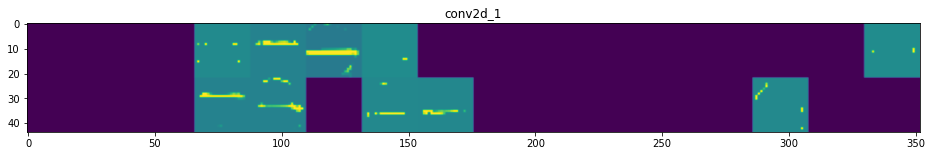

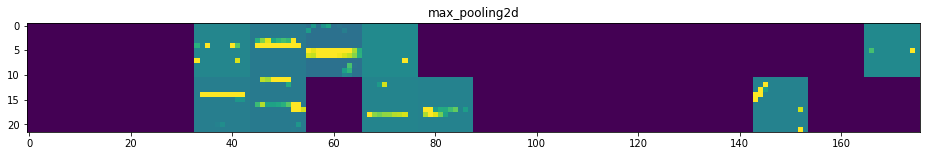

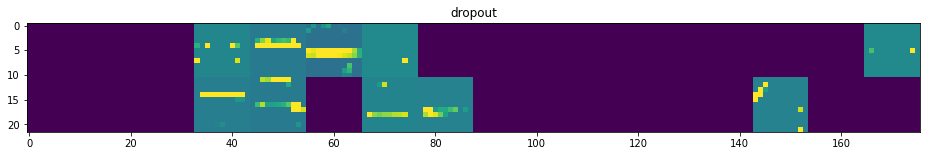

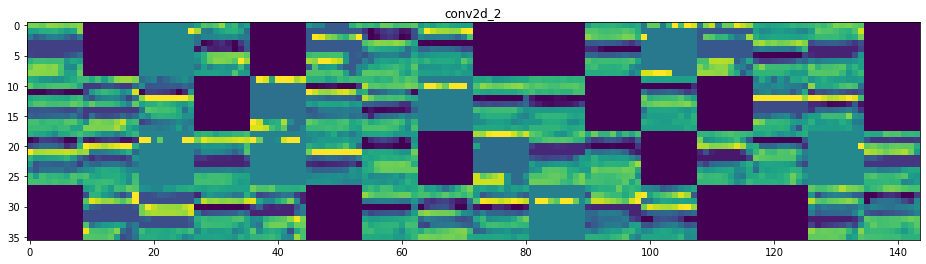

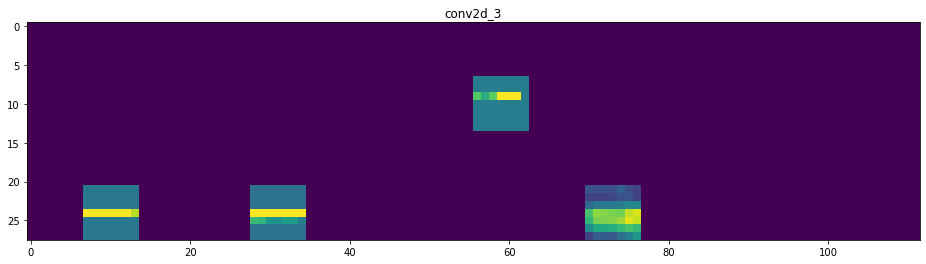

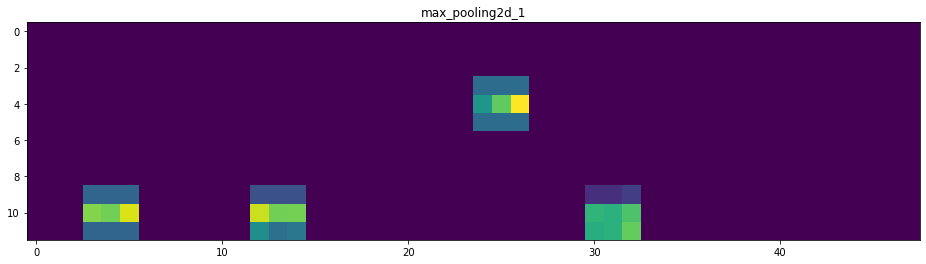

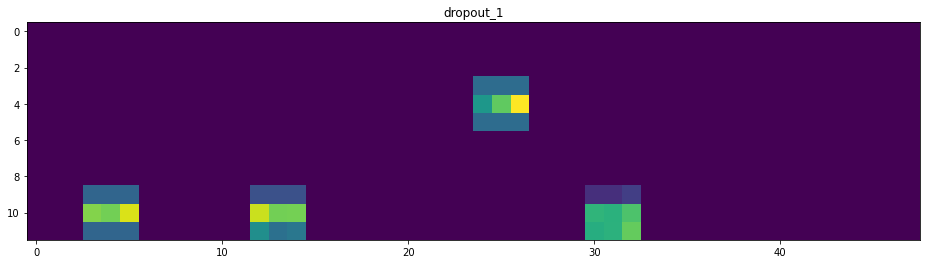

In [69]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

Text(0.5, 1.0, '49th filter output of 4th conv layer')

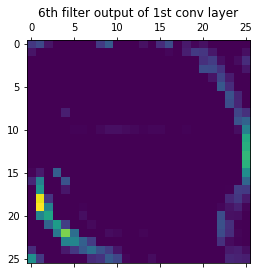

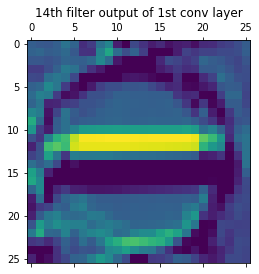

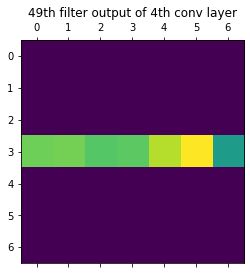

In [73]:
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
plt.title("6th filter output of 1st conv layer")  

# 14th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 14], cmap ='viridis')
plt.title("14th filter output of 1st conv layer") 

# 49th channel of the image after fouth layer of convolution is applied
plt.matshow(sixth_layer_activation[0, :, :, 49], cmap ='viridis')
plt.title("49th filter output of 4th conv layer")  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

In [2]:
from keras.models import load_model

model = load_model('tsr_vgg.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

(1, 32, 32, 3)


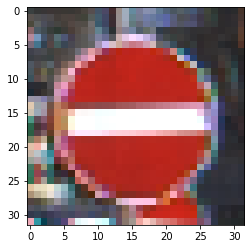

In [3]:
from keras.preprocessing import image
import numpy as np

y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Pre-processing the image
img = image.load_img(imgs[1000], target_size = (32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [4]:
from keras import models
from keras import layers

In [5]:
# Outputs of the 12 layers
layer_outputs = [layer.output for layer in model.layers[:22]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
  
# Getting Activations of first layer
first_layer_activation = activations[0]
sixth_layer_activation = activations[5]  
# shape of first layer activation
print(first_layer_activation.shape)
print(sixth_layer_activation.shape)  


(1, 32, 32, 64)
(1, 8, 8, 128)


C:\Users\2001p\AppData\Local\Temp\ipykernel_9376\2900340538.py:28: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

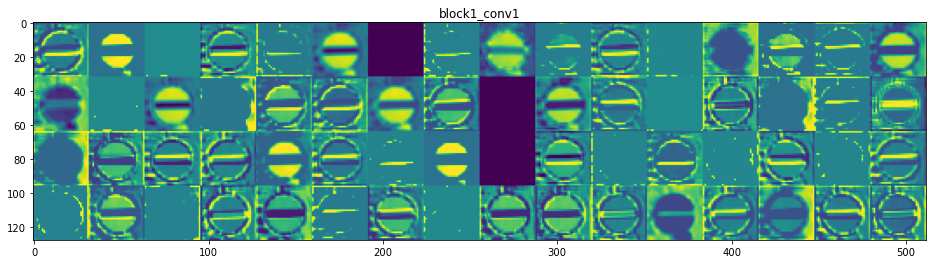

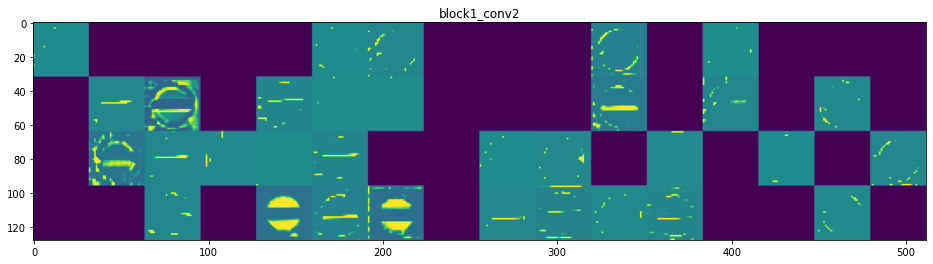

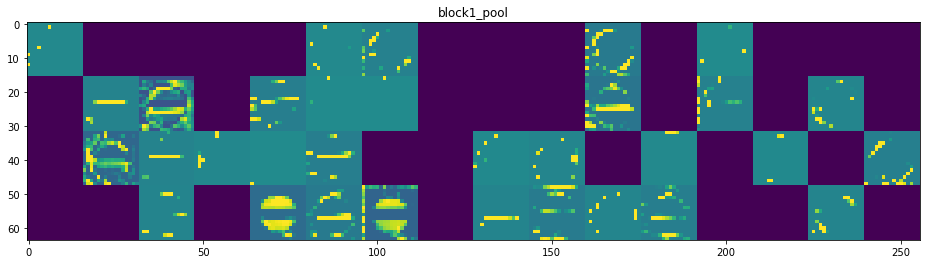

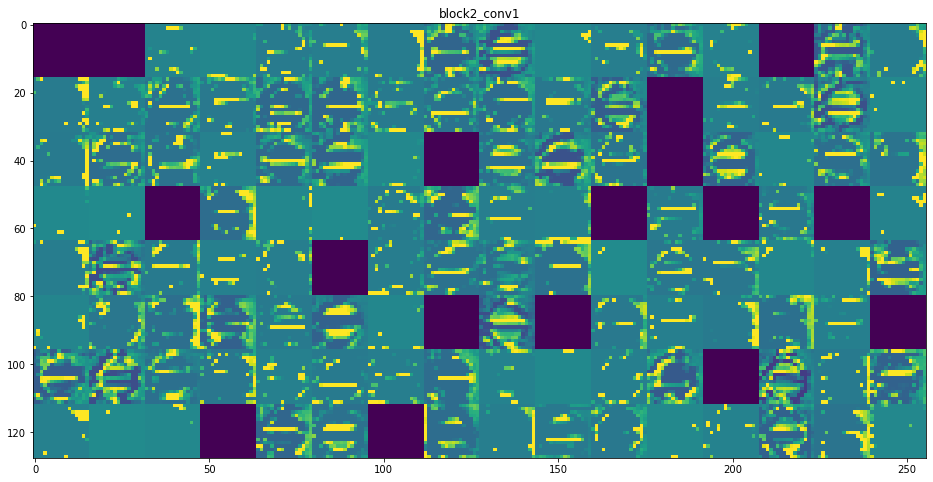

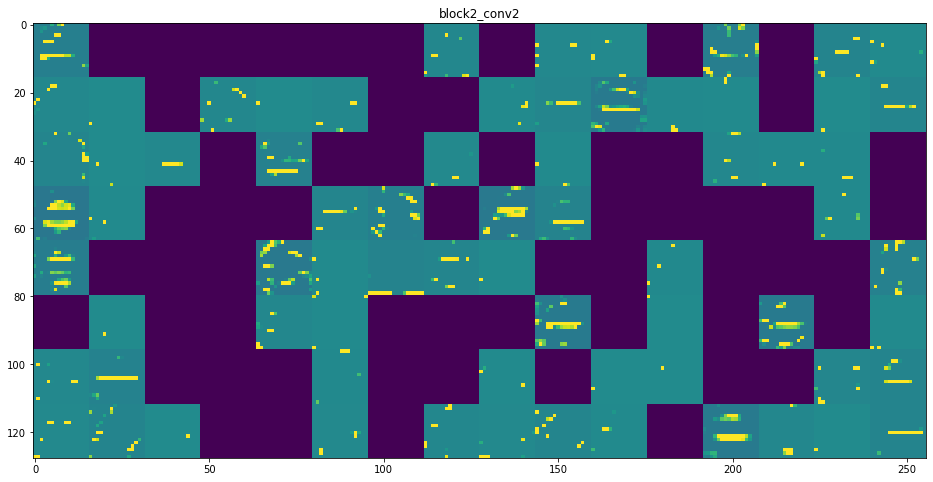

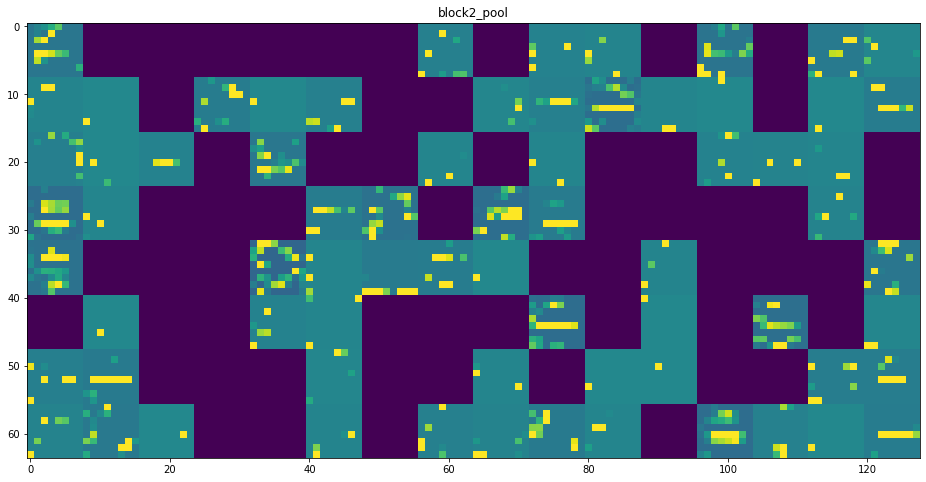

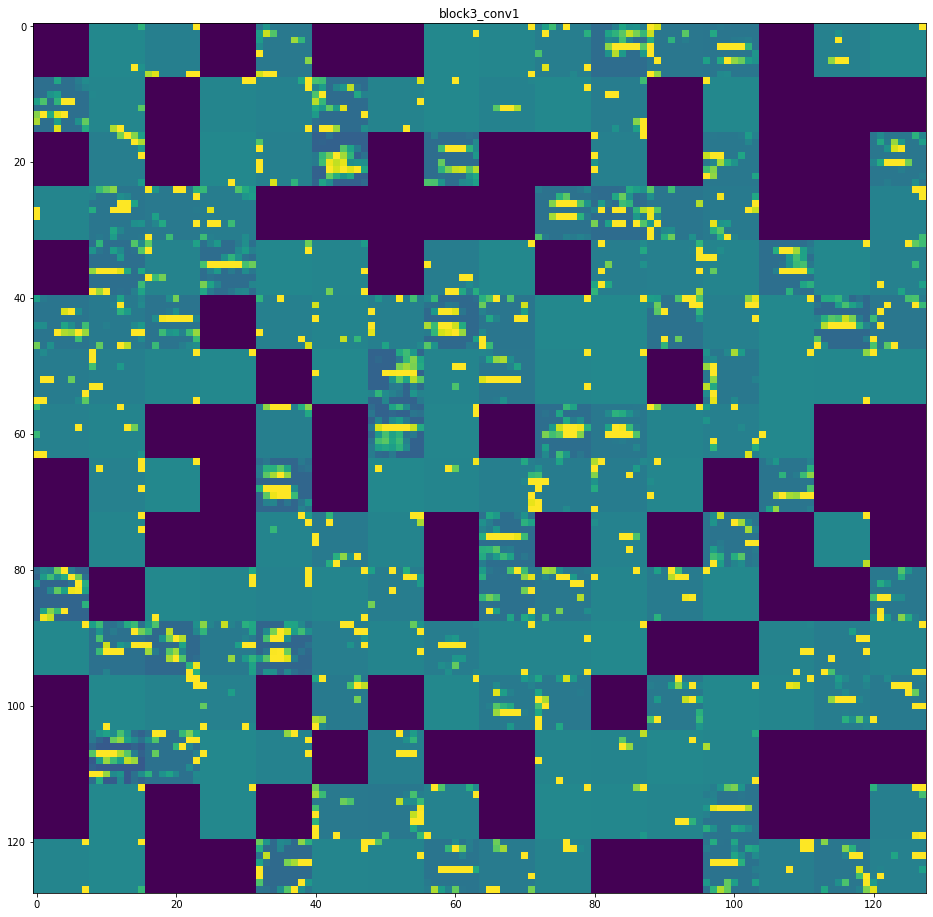

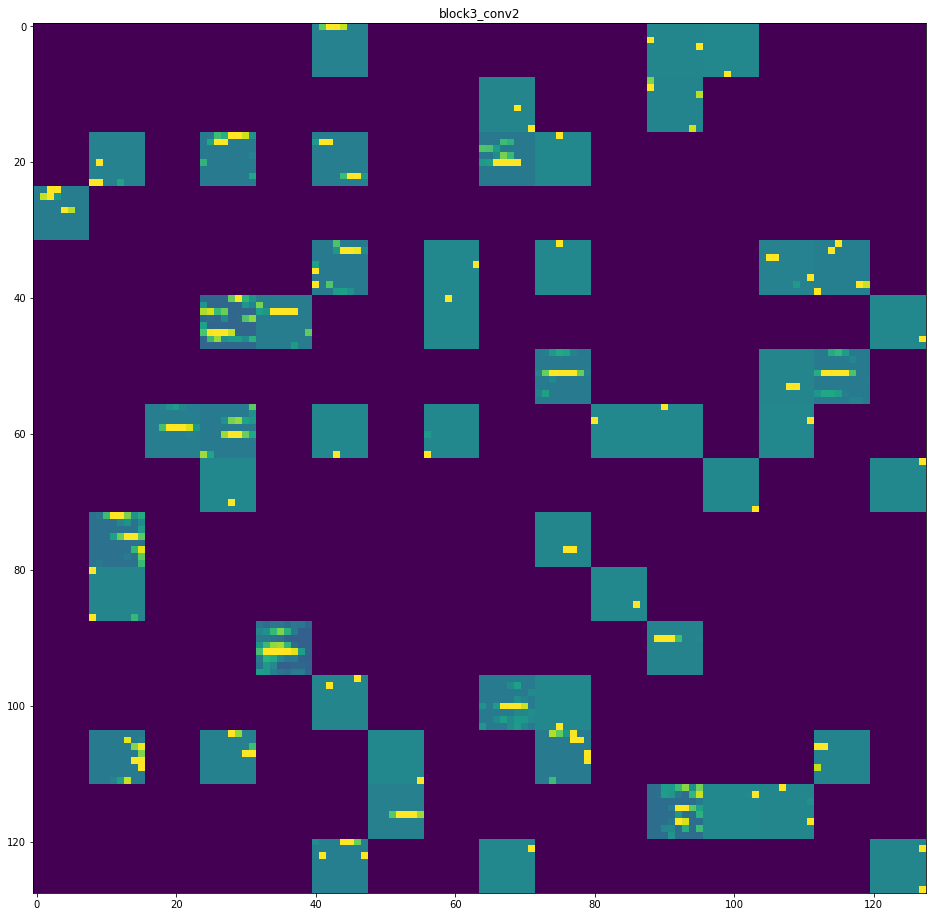

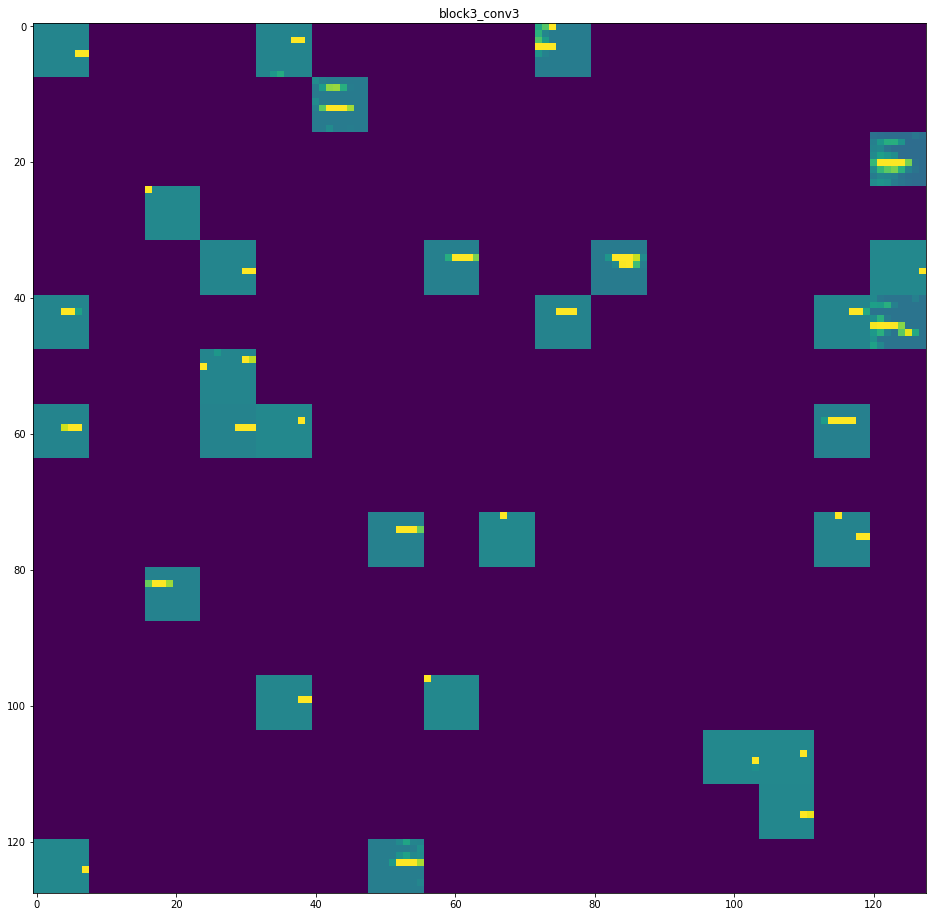

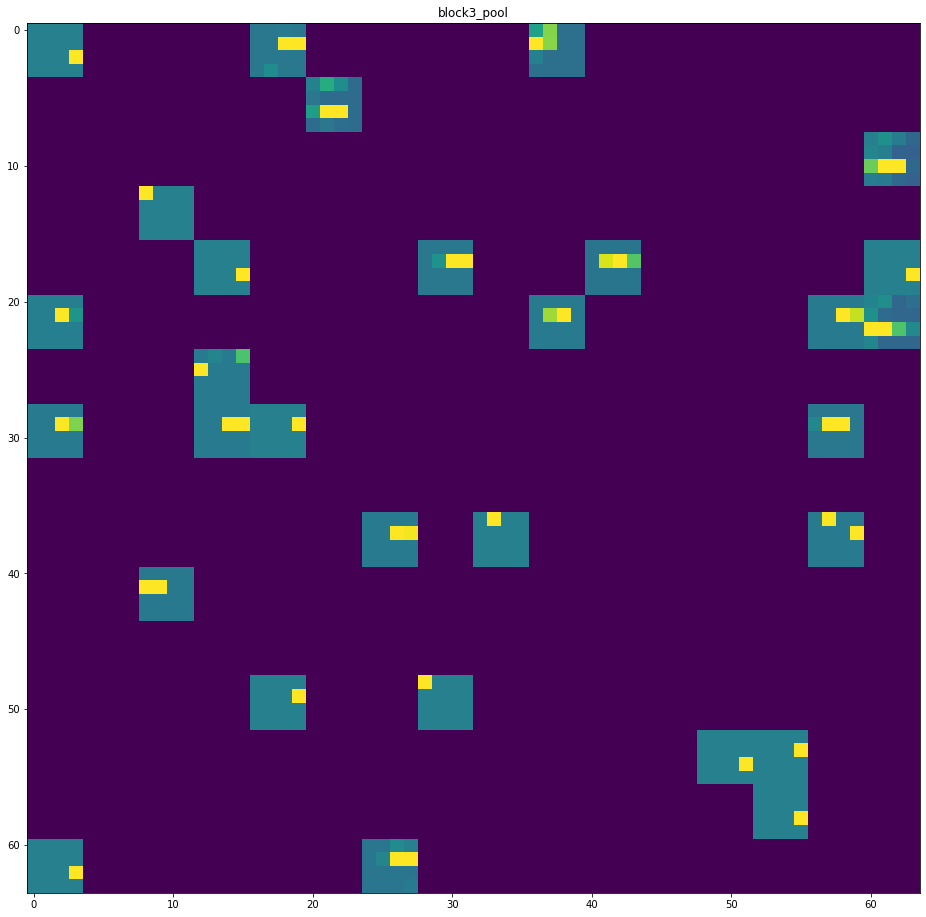

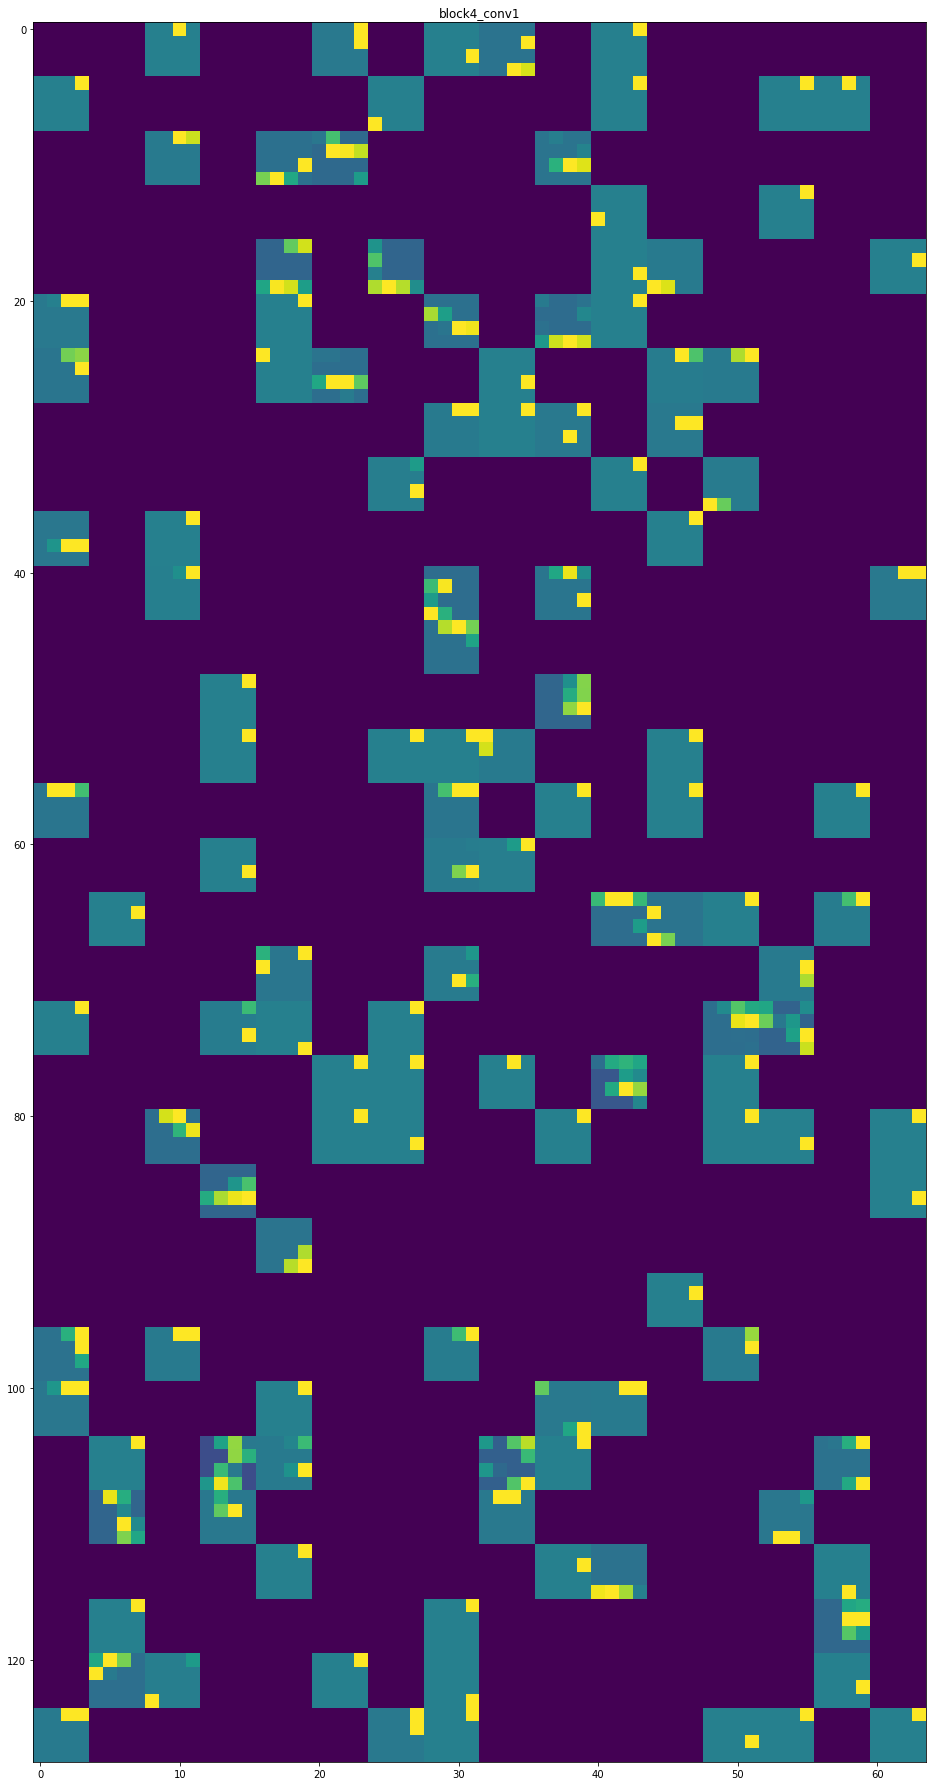

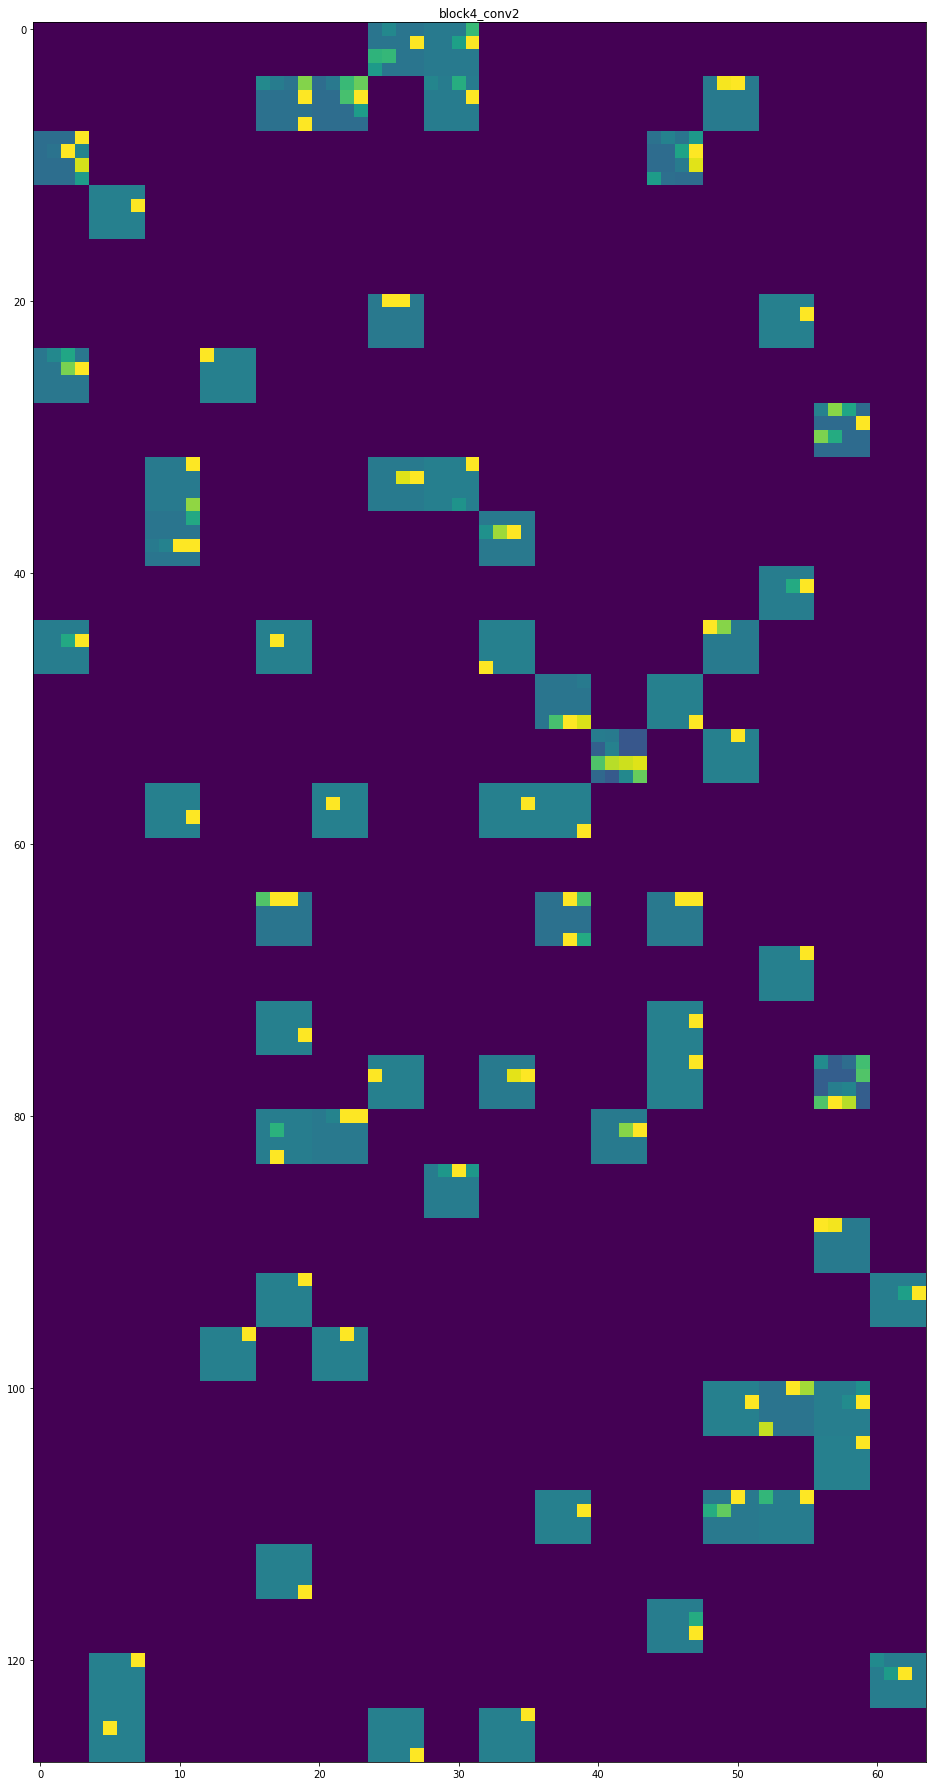

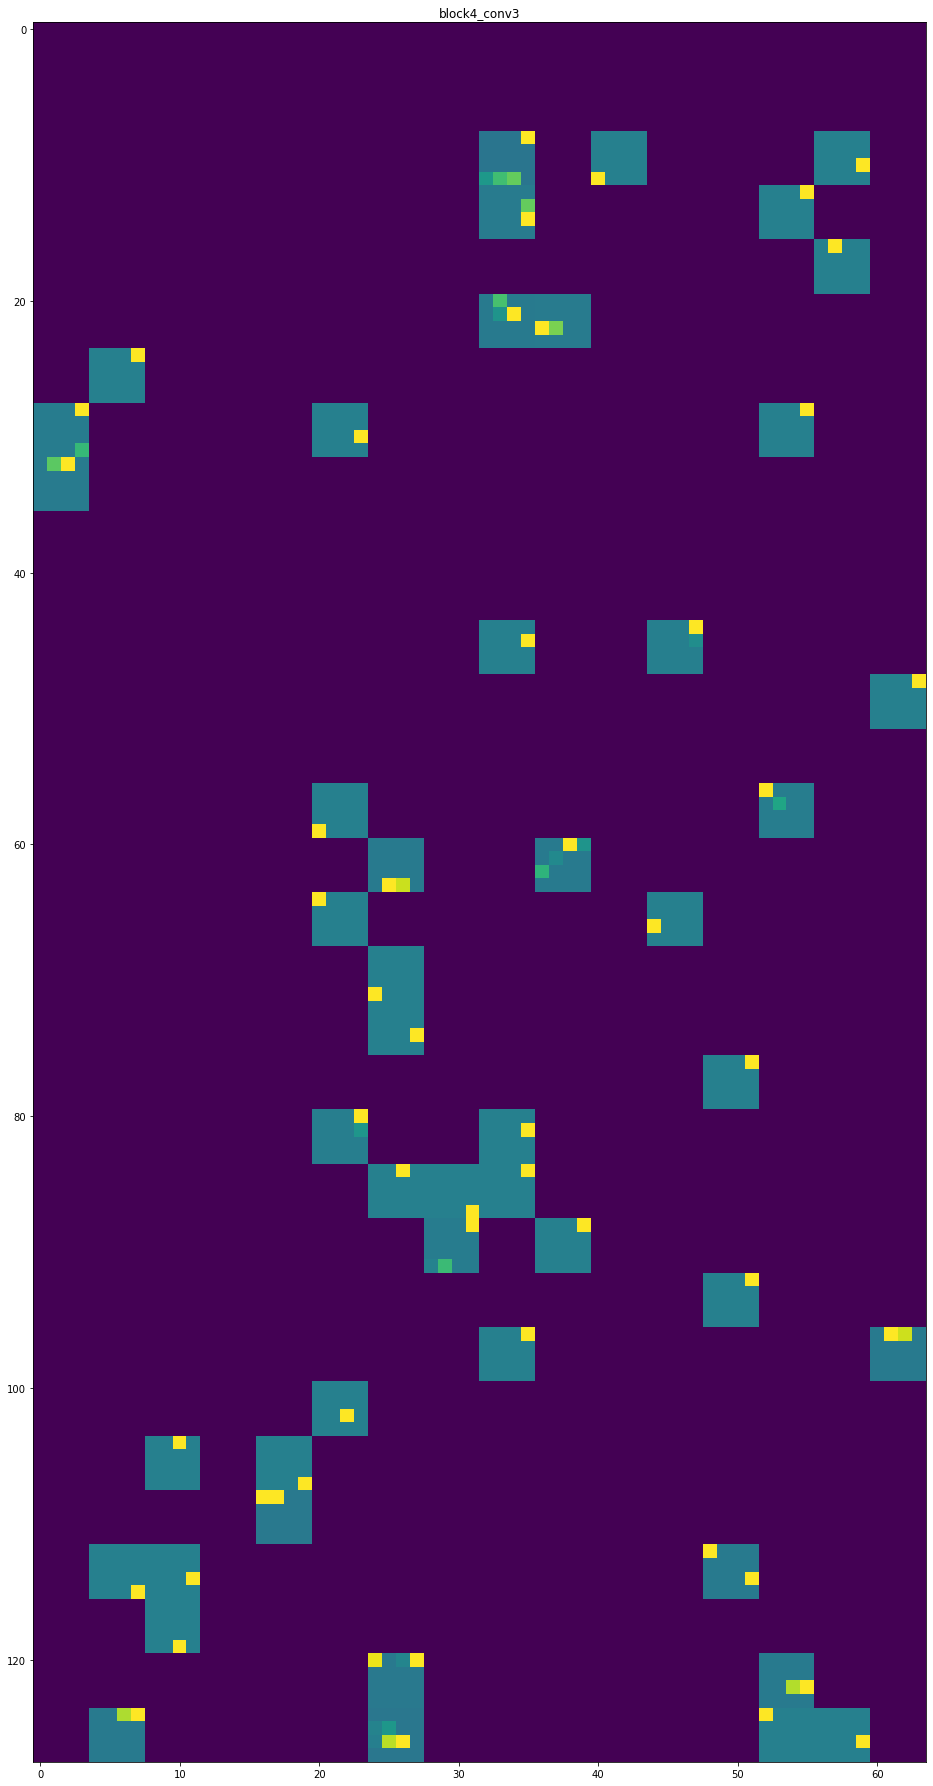

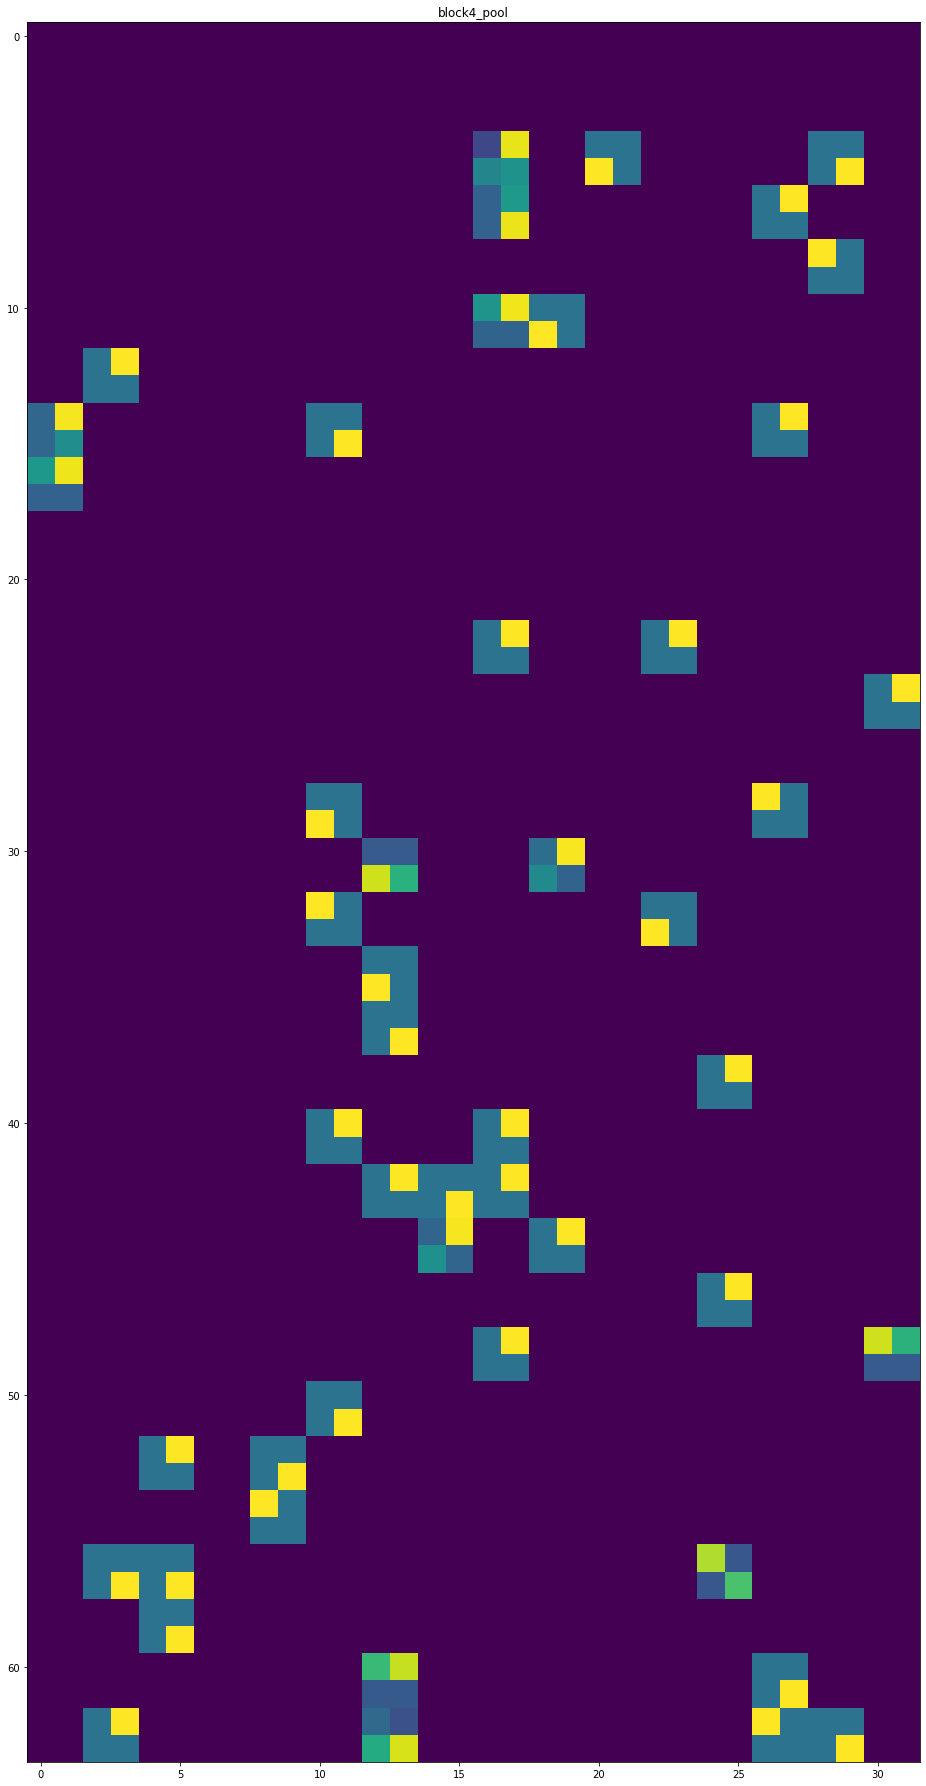

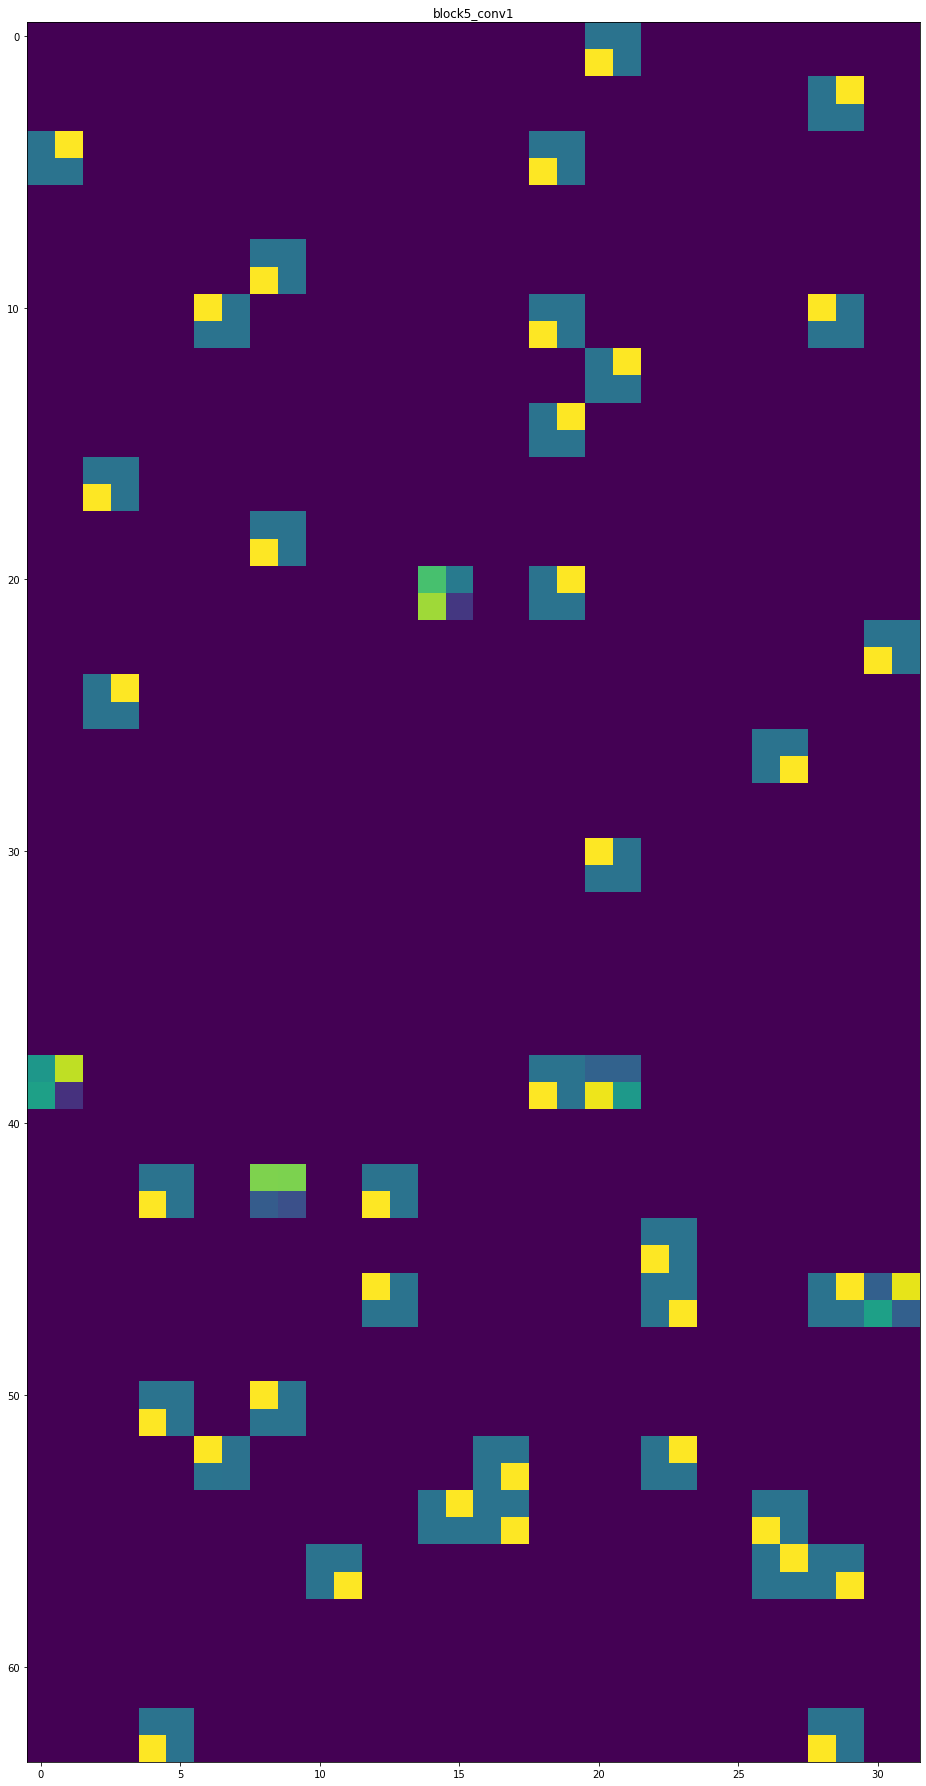

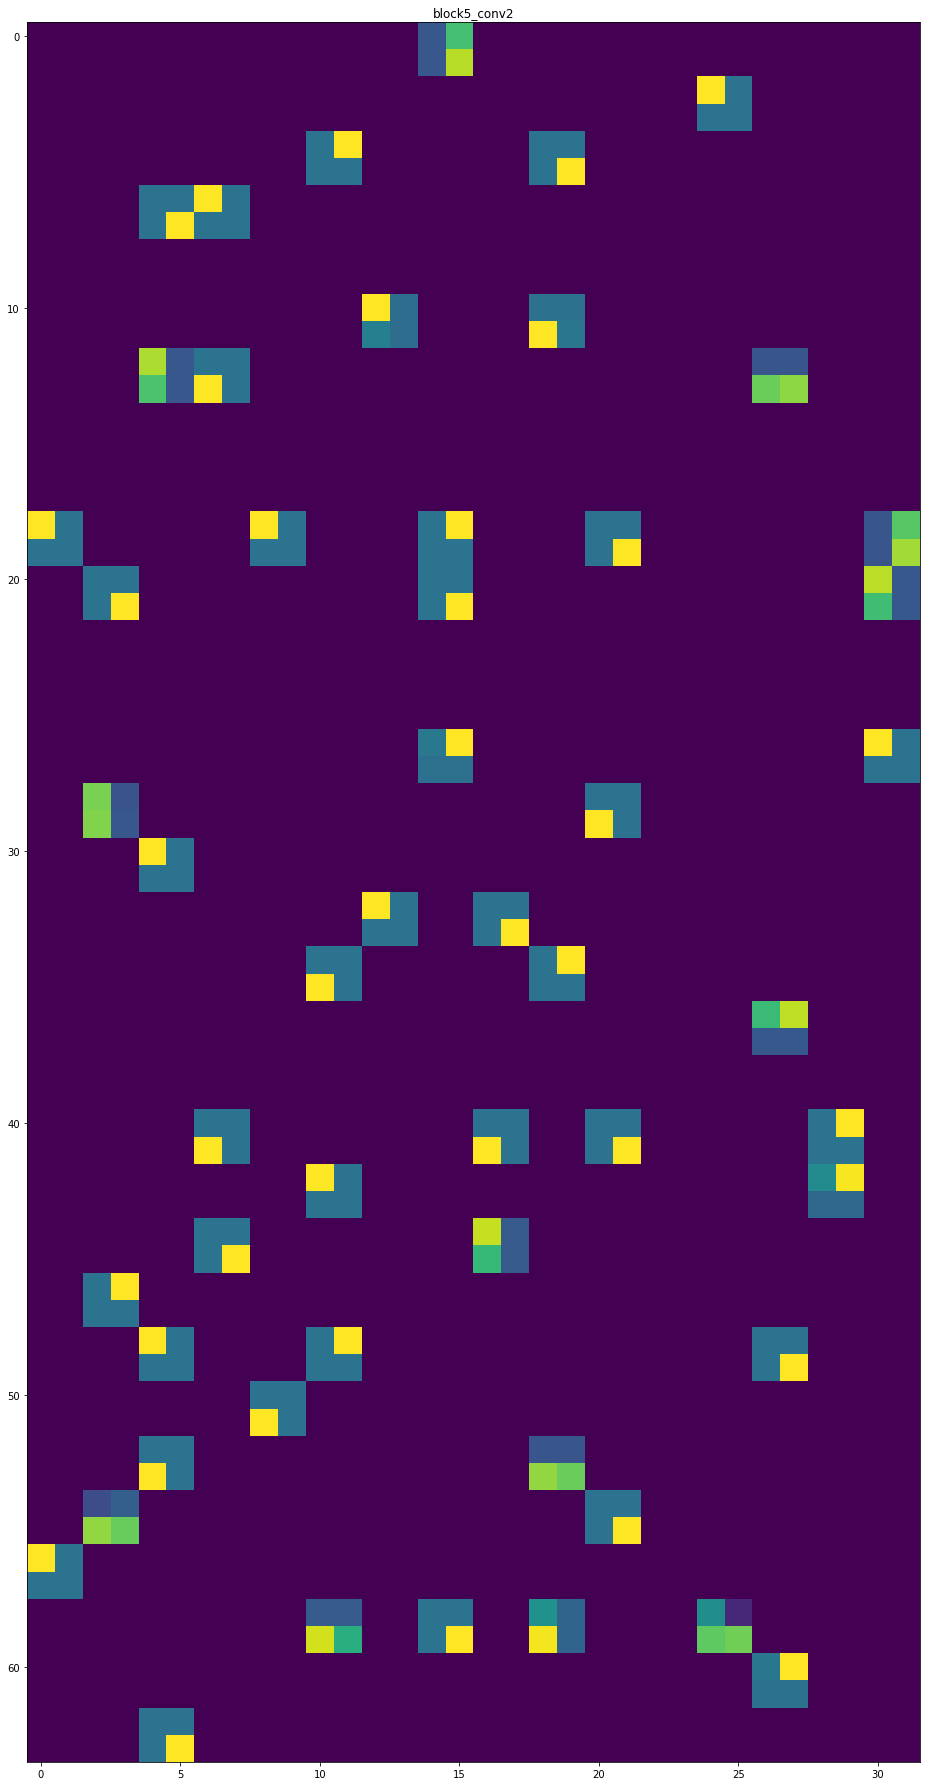

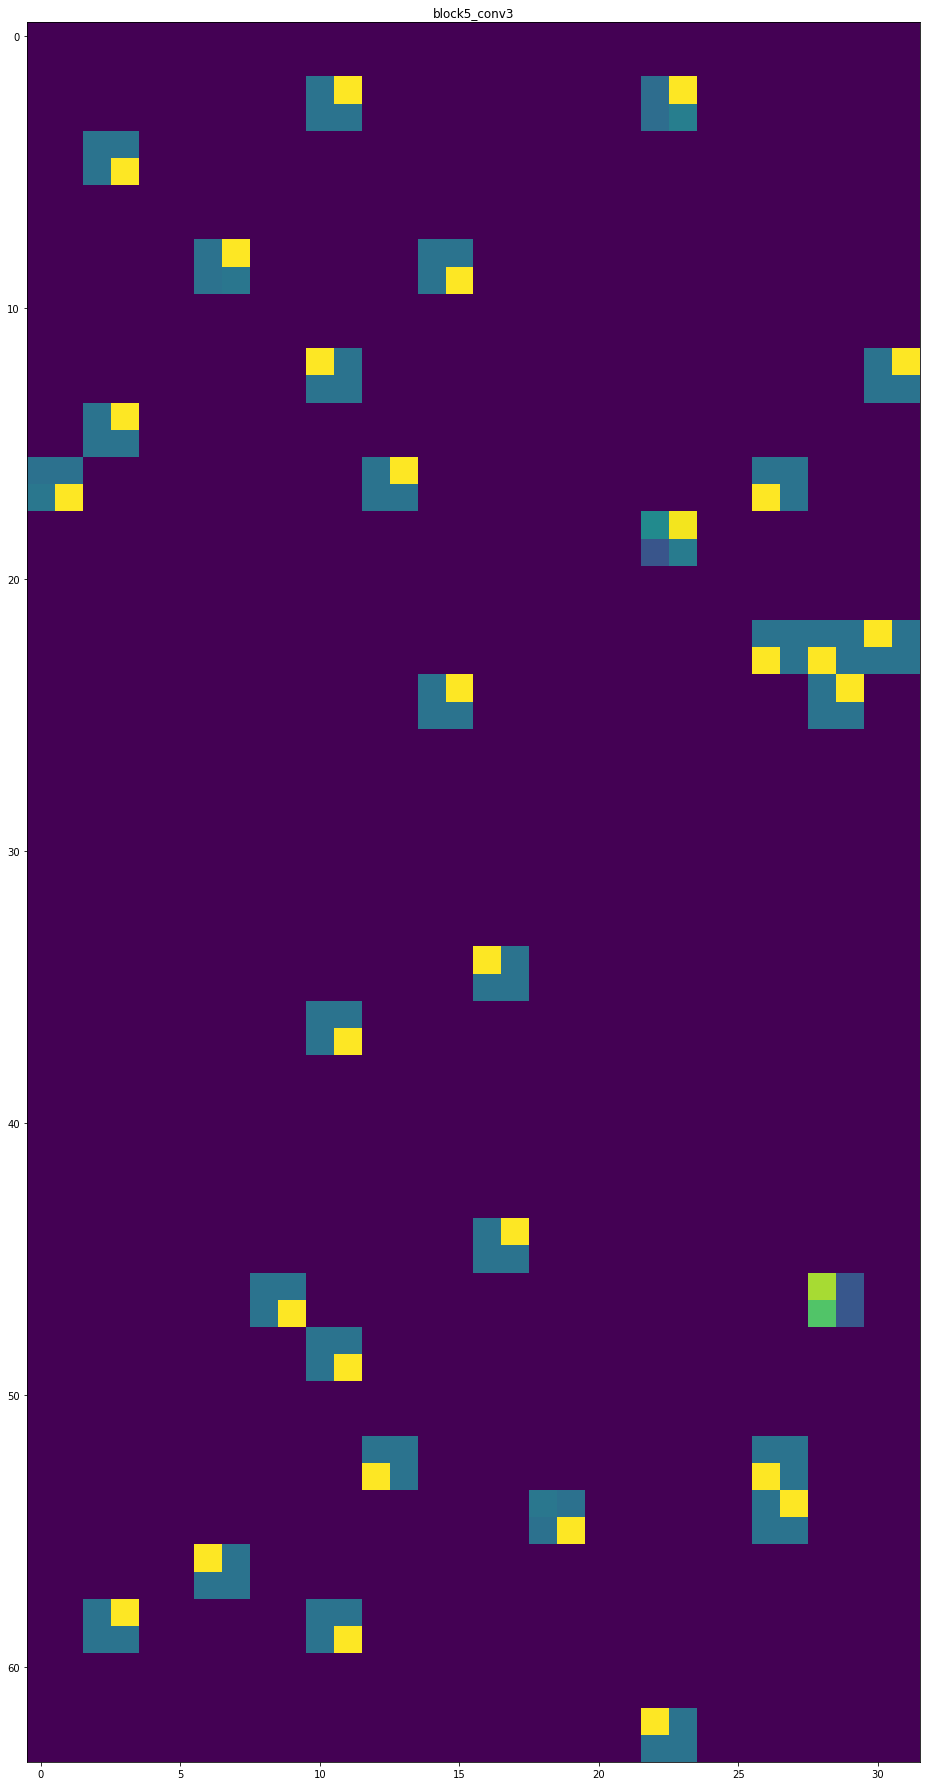

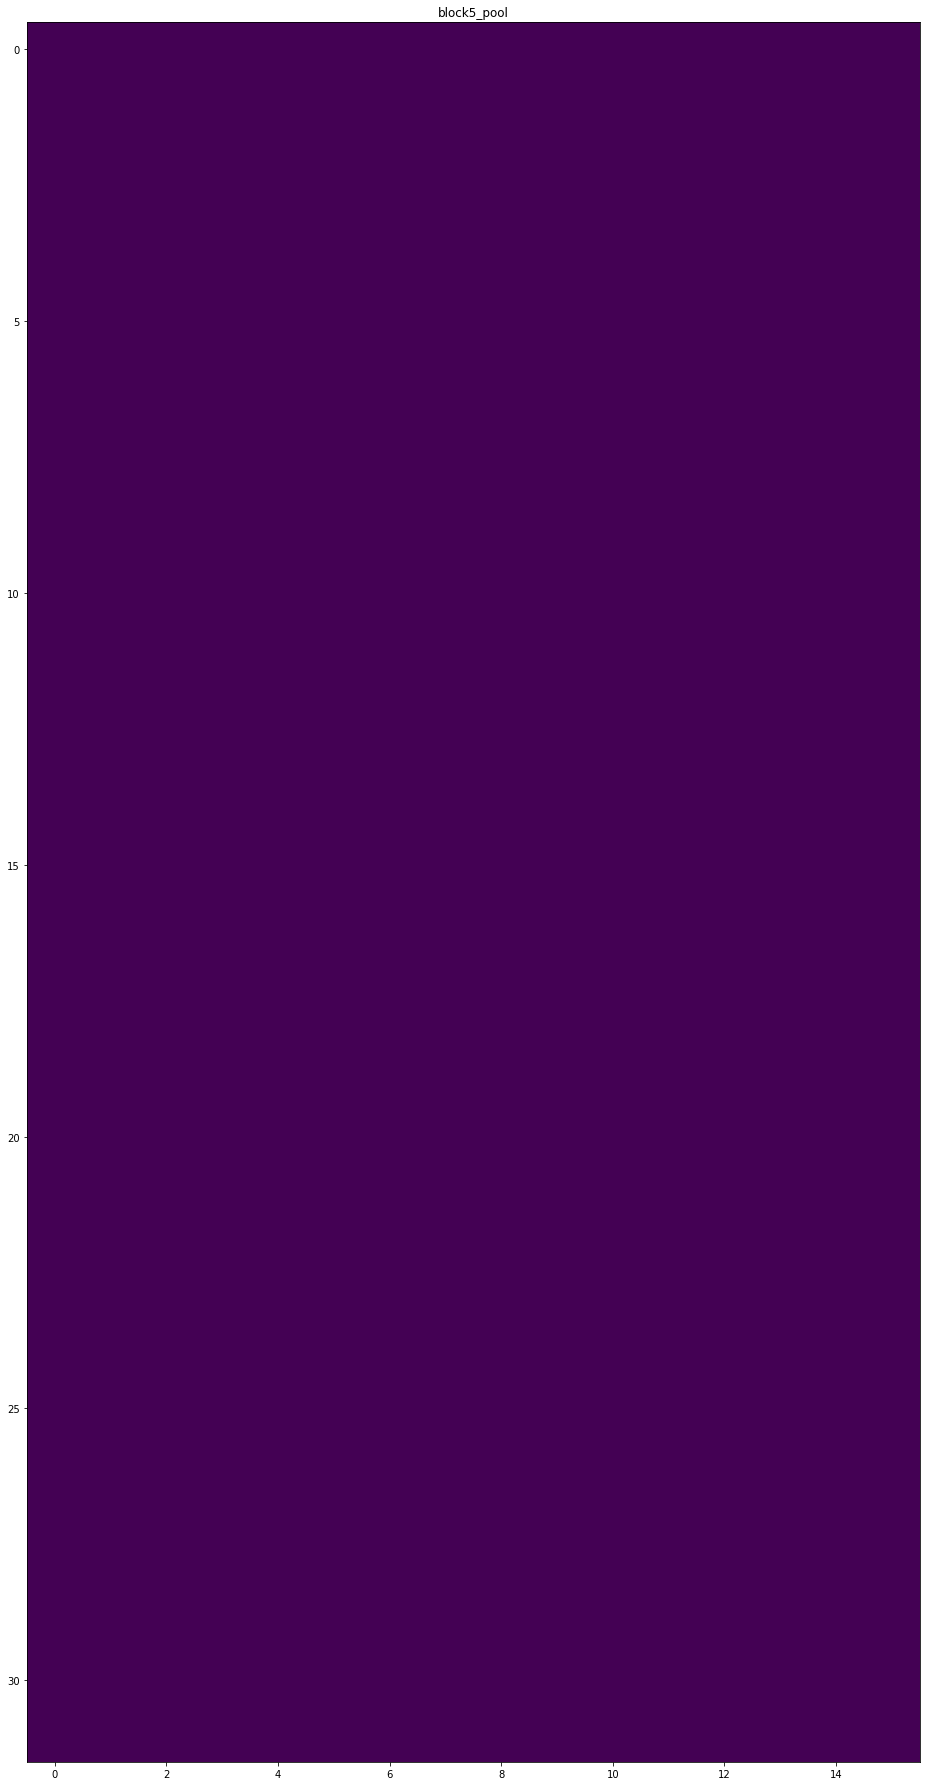

In [6]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:22]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()